# Estimating SeaSign parameters

In [1]:
import math

In [2]:
def sizes(n, B, logp, λ, s=1):
    '''
    Computes signature sizes in bits for the schemes of Secs. 4 and 5.
    
    n, B, log(p), λ and s are as in the paper.
    '''
    if λ % s != 0:
        raise RuntimeError("s (=%d) must divide λ (=%d)" % (s,λ))
    if logp < n*math.log2(n):
        raise RuntimeError("Incompatible parameters: log(p) (=%d) must be greater than n·log(n) (=%f)" %
                          (logp, n*math.log2(n)))
    t = λ // s
    # bits to encode the lattice vectors
    lattice = t * math.ceil(n * math.log2(2*n*t*B + 1))
    # Signature size (Shorter signatures, Sec. 4)
    short = lattice + λ
    # Signature size (Smaller PKs, Sec. 5)
    compressedpk = lattice + t*logp + λ*(λ - t*math.log2(t))
    return (short / 8, compressedpk / 8)

In [3]:
def sigtime(n, B, λ, s=1):
    '''
    Lower bound on the (log₂ of the) runtime of the signature algorithm.
    
    This value only makes sense up to an additive constant.
    '''
    return math.log2( (λ // s)**2 * B * n**3 * math.log(n) )

## CSIDH-1 values

As in the paper

In [4]:
sizes(74,5,500,128,16)

(944.0, 3092.0)

In [5]:
sigtime(74,4,128,16)

28.734059993771332

## Other choices

We may choose n and B differently, according to a security parameter. It is harder to estimate signing time precisely, but the lower bound `sigtime` still gives an idea of the (relative) performance.

In [6]:
from matplotlib import pyplot as plt

In [7]:
def B(n, λ=128, mitm=2):
    '''
    Compute B as a function of n and λ.
    
    The parameter mitm controls the expected running time of a meet in the middle attack.
    mitm=2 protects against the classical attack, use mitm=3 for protection against Tani's algorithm.
    '''
    return math.ceil((2**(mitm * λ / n)  - 1) / 2)

We get numbers for λ=128 and n ranging from 15 to 80, with a fixed p (500 bits).

First we use the parameter `mitm=2`, like in CSIDH.

In [8]:
sigperf = [(sizes(n,B(n),500,128,16)[0], sigtime(n,B(n),128,16), n) for n in range(15,80)]  
sigperf

[(376.0, 35.22458310741395, 15),
 (385.0, 34.4712336270551, 16),
 (393.0, 33.82366509874603, 17),
 (402.0, 33.263221206021434, 18),
 (410.0, 32.77548106523592, 19),
 (419.0, 32.348783969223, 20),
 (428.0, 31.97361023257039, 21),
 (437.0, 31.64301294521943, 22),
 (446.0, 31.34994928921127, 23),
 (455.0, 31.09014260571483, 24),
 (464.0, 30.858916824278023, 25),
 (473.0, 30.65083855719347, 26),
 (482.0, 30.465087605749652, 27),
 (491.0, 30.303199956155137, 28),
 (500.0, 30.152081945756684, 29),
 (510.0, 30.018095979727583, 30),
 (519.0, 29.899861437520578, 31),
 (529.0, 29.793161721942464, 32),
 (538.0, 29.693984485369107, 33),
 (547.0, 29.604130458858304, 34),
 (557.0, 29.539767949450024, 35),
 (567.0, 29.45967644010621, 36),
 (577.0, 29.411463058179326, 37),
 (586.0, 29.33468441493903, 38),
 (595.0, 29.284042400130424, 39),
 (605.0, 29.2412843525881, 40),
 (615.0, 29.21339110325672, 41),
 (625.0, 29.166554160978613, 42),
 (635.0, 29.144183641902558, 43),
 (644.0, 29.105634165023762, 44)

There are some fluctuations due to ceil and floor functions. Optimum running time seems to be reached around n=50, with signatures of around 700B.

Below we plot signature size against (log) running time

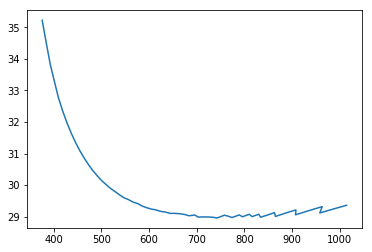

In [9]:
plt.plot(*list(zip(*sigperf))[:2])

Same plot, but with `mitm=3`. We do not loose much in signature size, slowdown is roughly a constant.

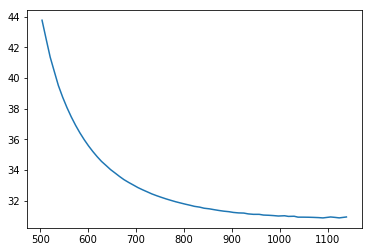

In [10]:
sigperf = [(sizes(n,B(n,mitm=3),500,128,16)[0], sigtime(n,B(n,mitm=3),128,16)) for n in range(15,80)]  
plt.plot(*zip(*sigperf))